In [72]:
#mathavan S
#212221220031

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense


In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:

X_test.shape

(10000, 28, 28)

In [5]:

single_image= X_train[0]

In [6]:

single_image.shape

(28, 28)

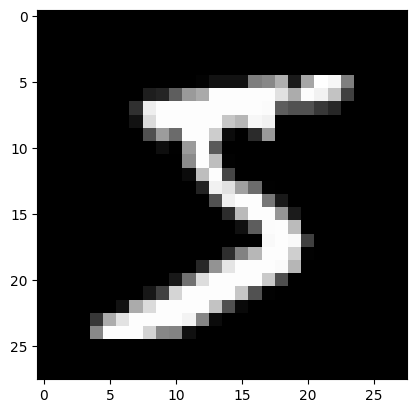

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:

y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

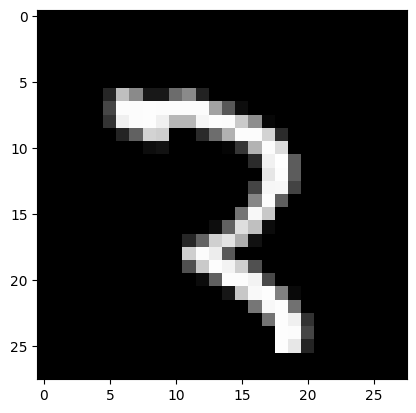

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
inputs1=keras.Input(shape=(28,28,1))
model.add(inputs1)
model.add(layers.Conv2D(filters=38,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(38,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 38)        988       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 38)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5472)              0         
                                                                 
 dense (Dense)               (None, 38)                207974    
                                                                 
 dense_1 (Dense)             (None, 15)                585       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                        

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=6,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/6
938/938 [==============================] - 36s 37ms/step - loss: 0.2402 - accuracy: 0.9299 - val_loss: 0.0852 - val_accuracy: 0.9740
Epoch 2/6
938/938 [==============================] - 35s 37ms/step - loss: 0.0728 - accuracy: 0.9787 - val_loss: 0.0498 - val_accuracy: 0.9841
Epoch 3/6
938/938 [==============================] - 34s 36ms/step - loss: 0.0522 - accuracy: 0.9843 - val_loss: 0.0471 - val_accuracy: 0.9849
Epoch 4/6
938/938 [==============================] - 34s 36ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0458 - val_accuracy: 0.9850
Epoch 5/6
938/938 [==============================] - 31s 33ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0402 - val_accuracy: 0.9874
Epoch 6/6
938/938 [==============================] - 33s 35ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.0372 - val_accuracy: 0.9875


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.240205,0.929900,0.085165,0.9740
1,0.072812,0.978667,0.049833,0.9841
2,0.052228,0.984300,0.047127,0.9849
3,0.038641,0.988133,0.045840,0.9850
4,0.031061,0.990150,0.040159,0.9874


<Axes: >

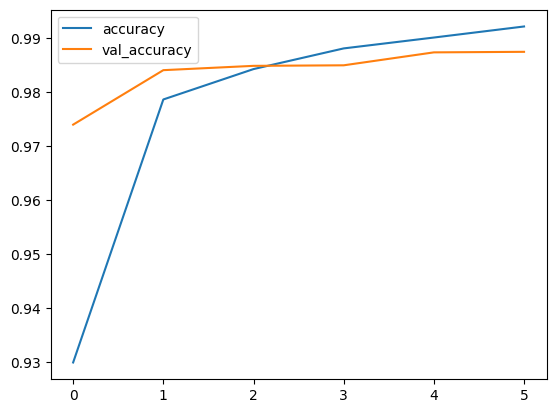

In [27]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

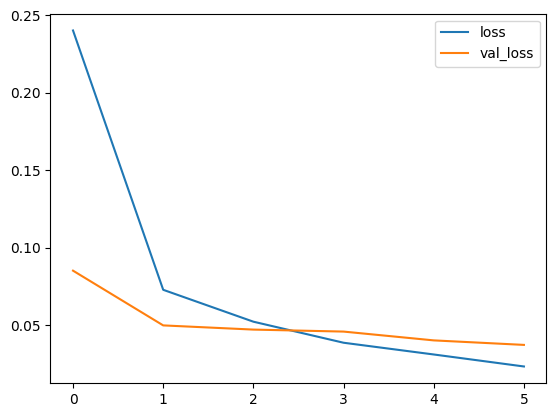

In [28]:
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [30]:

print(confusion_matrix(y_test,x_test_predictions))

[[ 970    1    1    0    0    1    3    0    2    2]
 [   0 1127    2    2    0    0    2    2    0    0]
 [   2    1 1018    1    2    1    0    4    2    1]
 [   0    0    2  990    0   14    0    1    2    1]
 [   0    0    0    0  975    0    4    0    1    2]
 [   1    0    0    4    0  885    1    0    1    0]
 [   5    2    0    0    5    4  941    0    1    0]
 [   1    1    3    1    0    0    0 1019    1    2]
 [   3    0    1    2    0    2    2    2  955    7]
 [   0    1    0    0    6    5    0    2    0  995]]


In [31]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [58]:

img = image.load_img('5.jpg')


In [59]:
type(img)


PIL.JpegImagePlugin.JpegImageFile

In [60]:
img = image.load_img('5.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [68]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [69]:

print(x_single_prediction)

[5]


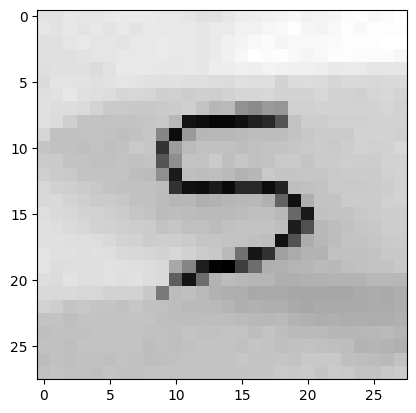

In [70]:

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [71]:

print(x_single_prediction)

[5]


In [ ]:
#mathavan S
#212221220031